In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [129]:
persons_df = pd.read_csv("Motor_Vehicle_Collisions_-_Person_20241111.csv")

In [58]:
print("\nNull Values in Persons Data:")
print(persons_df.isnull().sum())
print("\nData Types in Persons Data:")
print(persons_df.dtypes)


Null Values in Persons Data:
COLLISION_ID              0
CRASH_DATE                0
CRASH_TIME                0
PERSON_TYPE               0
PERSON_AGE                0
EMOTIONAL_STATUS          0
BODILY_INJURY             0
PED_LOCATION              0
PED_ACTION               93
CONTRIBUTING_FACTOR_1     0
PERSON_SEX                0
dtype: int64

Data Types in Persons Data:
COLLISION_ID                      int64
CRASH_DATE               datetime64[ns]
CRASH_TIME                       object
PERSON_TYPE                      object
PERSON_AGE                        int32
EMOTIONAL_STATUS                 object
BODILY_INJURY                    object
PED_LOCATION                     object
PED_ACTION                       object
CONTRIBUTING_FACTOR_1            object
PERSON_SEX                       object
dtype: object


### I filled all missing ages with -1 because I anticipated data loss from the restrictive merge conditions I planned to apply. My goal was to minimize any further data loss, so I assigned -1 to the missing age values. Further manipulation of the "age" column will be required in the future, but for now, -1 is used to avoid losing more data than necessary.

In [131]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].fillna(-1)
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].astype(int)

In [133]:
persons_df['CRASH_DATE'] = pd.to_datetime(persons_df['CRASH_DATE'])
persons_df['CRASH_TIME'] = pd.to_datetime(persons_df['CRASH_TIME'], format='%H:%M').dt.time

In [135]:
columns_to_drop_persons = [
    'UNIQUE_ID', 'PERSON_ID', "VEHICLE_ID","EJECTION","POSITION_IN_VEHICLE","SAFETY_EQUIPMENT",
    "COMPLAINT","PED_ROLE", "PERSON_INJURY", "CONTRIBUTING_FACTOR_2"
]
persons_df.drop(columns=columns_to_drop_persons, inplace=True)

In [145]:
persons_df.tail(5)

,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_TYPE,PERSON_AGE,EMOTIONAL_STATUS,BODILY_INJURY,PED_LOCATION,PED_ACTION,CONTRIBUTING_FACTOR_1,PERSON_SEX
56527,4769000,2024-11-05,12:45:00,Pedestrian,45,Conscious,Elbow-Lower-Arm-Hand,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Other Actions in Roadway,View Obstructed/Limited,M
56528,4769168,2024-11-05,12:52:00,Pedestrian,49,Conscious,Elbow-Lower-Arm-Hand,Pedestrian/Bicyclist/Other Pedestrian Not at I...,"Crossing, No Signal, Marked Crosswalk",Pedestrian/Bicyclist/Other Pedestrian Error/Co...,M
56529,4769217,2024-11-05,17:00:00,Pedestrian,11,Conscious,Knee-Lower Leg Foot,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Does Not Apply,Unspecified,M
56530,4769512,2024-11-05,19:50:00,Pedestrian,37,Conscious,Knee-Lower Leg Foot,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Unspecified,F
56531,4769336,2024-11-05,16:32:00,Pedestrian,18,Conscious,Abdomen - Pelvis,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unknown,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,F


### Created a new group called Undisclosed. This will be assigned to missing cells, since they are categorical. By doing this, I am reducing the bias associate with deleting rows of data.

In [137]:
persons_df['EMOTIONAL_STATUS'] = persons_df['EMOTIONAL_STATUS'].fillna('Unknown') #Unknown was already used in the original file to identify unknown values
persons_df['BODILY_INJURY'] = persons_df['BODILY_INJURY'].fillna('Undisclosed')
persons_df['PED_LOCATION'] = persons_df['PED_LOCATION'].fillna('Unknown') #Unknown was already used in the original file to identify unknown values
persons_df['PERSON_SEX'] = persons_df['PERSON_SEX'].fillna('U') #"U" means undisclosed. This is in accordance to the naming system in the original datafile.
persons_df['PED_ACTION'] = persons_df['PED_ACTION'].fillna('Unknown') #Unknown was already used in the original file to identify unknown values

In [63]:
persons_df.shape

(56532, 11)

### The age column has -ve distribuion which is not possible. The code below is to remove all -ve values in the age column. 

In [139]:
persons_df = persons_df[(persons_df['PERSON_AGE'] >= 0) & (persons_df['PERSON_AGE'] <= 120)]

### Visualize the distibution of male and female victims in relation to age.

C:\Users\sophi\AppData\Local\Temp\ipykernel_13500\3880566396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=persons_df, x='PERSON_SEX', y='PERSON_AGE', palette='pastel')


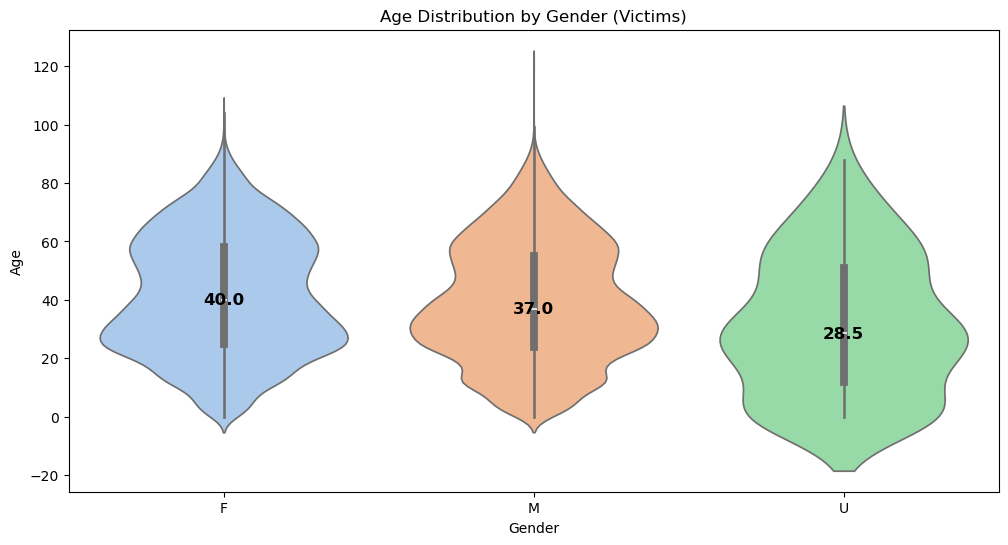

In [191]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=persons_df, x='PERSON_SEX', y='PERSON_AGE', palette='pastel')
group_medians = persons_df.groupby('PERSON_SEX')['PERSON_AGE'].median()

for i, median in enumerate(group_medians):
    plt.text(i, median, f'{median:.1f}', ha='center', va='center', fontsize=12, color='black', fontweight='bold')

plt.title('Age Distribution by Gender (Victims)')
plt.xlabel('Gender')
plt.ylabel('Age')
# plt.savefig()
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_13500\1206923968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=persons_df, x='PERSON_SEX', y='PERSON_AGE', palette='pastel')


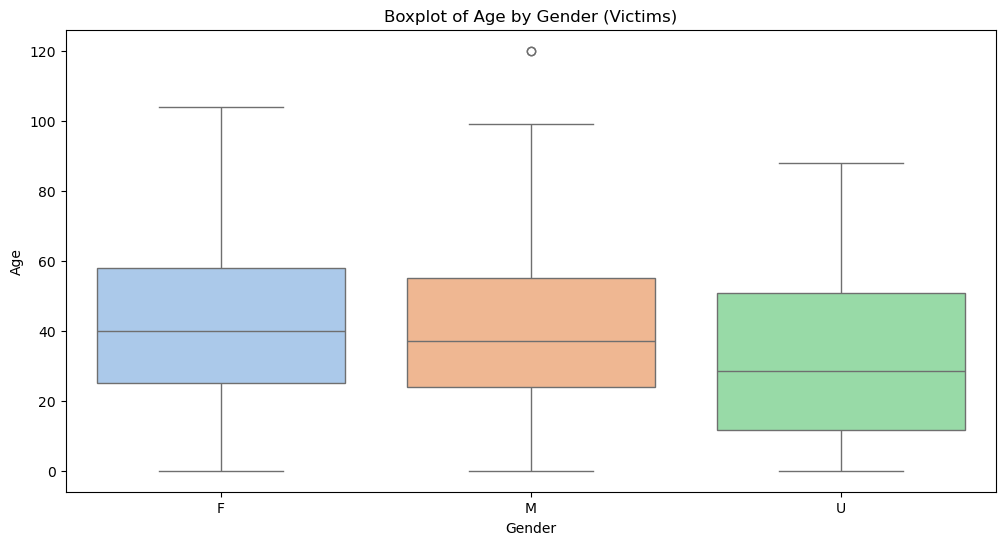

In [193]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=persons_df, x='PERSON_SEX', y='PERSON_AGE', palette='pastel')
plt.title('Boxplot of Age by Gender (Victims)')
plt.xlabel('Gender')
plt.ylabel('Age')
# plt.savefig()
plt.show()

### Visualize the top 5 contributing factors to accident in NYC over the past 5 years

C:\Users\sophi\AppData\Local\Temp\ipykernel_13500\1411707271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top5.values, y=Top5.index, palette='viridis')


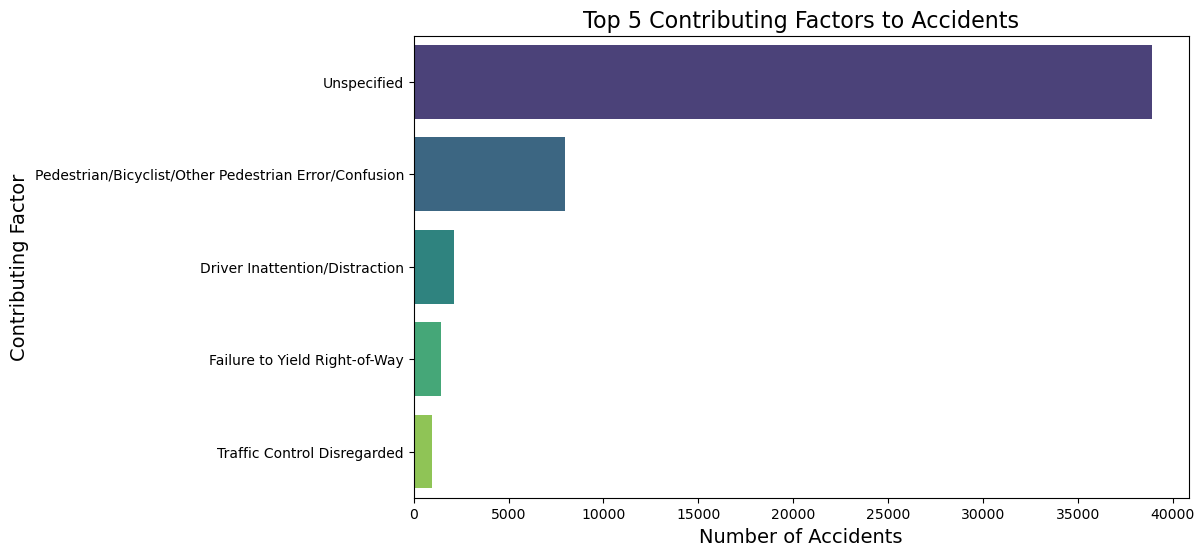

In [195]:
Counts = persons_df['CONTRIBUTING_FACTOR_1'].value_counts()

Top5 = Counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=Top5.values, y=Top5.index, palette='viridis')

plt.title('Top 5 Contributing Factors to Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Contributing Factor', fontsize=14)
# plt.savefig()
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_13500\1461487464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top5.values, y=Top5.index, palette='viridis')


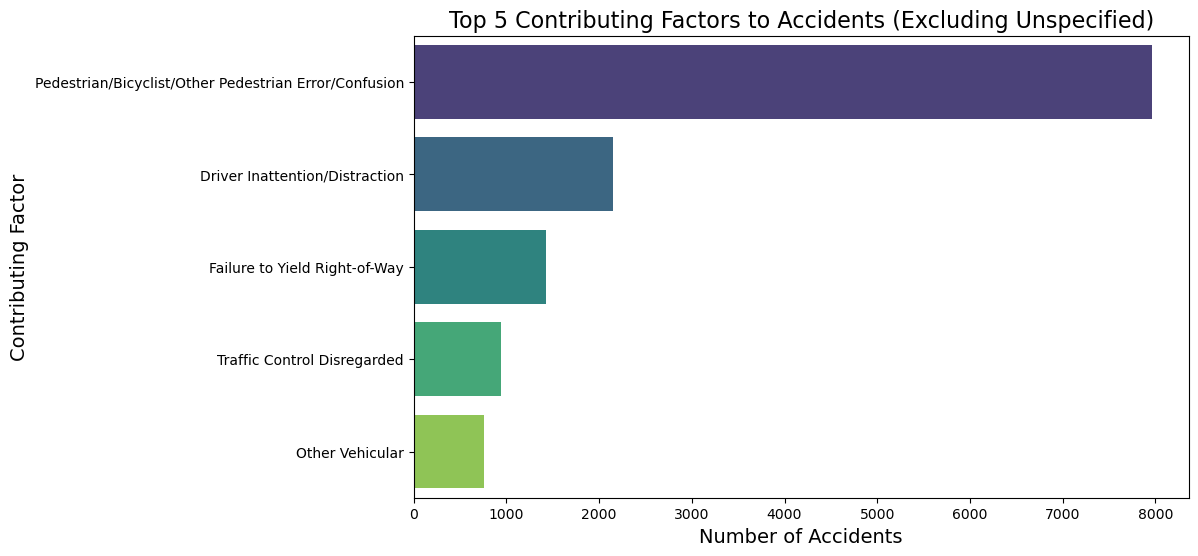

In [197]:
Counts = persons_df[persons_df['CONTRIBUTING_FACTOR_1'] != 'Unspecified']['CONTRIBUTING_FACTOR_1'].value_counts()

Top5 = Counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=Top5.values, y=Top5.index, palette='viridis')

plt.title('Top 5 Contributing Factors to Accidents (Excluding Unspecified)', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Contributing Factor', fontsize=14)
plt.savefig(r'C:\Users\sophi\OneDrive - Georgia Institute of Technology\Desktop\OMSA\Agronomy Analytics project\DataScience Projects\Persons_barchart_filtered.png', dpi=300, bbox_inches='tight')


plt.show()

## DEBUGGING

Enter any debugging code.

In [89]:
# persons_df['EMOTIONAL_STATUS'].unique()

In [91]:
# persons_df['PERSON_SEX'].unique()

In [177]:
# persons_df['CONTRIBUTING_FACTOR_1'].unique()

array(['Unspecified', 'Other Vehicular',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Traffic Control Disregarded', 'Failure to Yield Right-of-Way',
       'Pavement Slippery', 'View Obstructed/Limited',
       'Driver Inattention/Distraction', 'Alcohol Involvement',
       'Following Too Closely', 'Unsafe Speed', 'Passing Too Closely',
       'Traffic Control Device Improper/Non-Working',
       'Cell Phone (hand-Held)', 'Glare', 'Backing Unsafely',
       'Passing or Lane Usage Improper', 'Cell Phone (hands-free)',
       'Listening/Using Headphones', 'Aggressive Driving/Road Rage',
       'Physical Disability', 'Passenger Distraction',
       'Reaction to Uninvolved Vehicle', 'Animals Action',
       'Lost Consciousness', 'Prescription Medication',
       'Driverless/Runaway Vehicle', 'Obstruction/Debris',
       'Outside Car Distraction', 'Drugs (illegal)',
       'Driver Inexperience', 'Oversized Vehicle', 'Eating or Drinking',
       'Failure to Keep Ri

In [179]:
# persons_df["PERSON_AGE"].min()

In [181]:
# print(persons_df['PERSON_AGE'].describe())

In [183]:
# persons_df['PERSON_AGE'].unique()

In [185]:
# print(persons_df[persons_df['PERSON_AGE'] < 0])